In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市第一選區立委呂孫綾為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [9]:
lu = fb[fb.page_name == "呂孫綾"]
# 把時間格式轉換
lu['new_date'] = pd.to_datetime(lu['created_time_taipei']).dt.date
lu['post_hour'] = pd.to_datetime(lu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lu['month_year'] = pd.to_datetime(lu['new_date']).dt.to_period('M')
lu.head(1)

<ipython-input-9-683482bff596>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date'] = pd.to_datetime(lu['created_time_taipei']).dt.date
<ipython-input-9-683482bff596>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['post_hour'] = pd.to_datetime(lu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-9-683482bff596>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,0,0,0,0,0,8,8,2019-01-15,11,2019-01


In [10]:
#發文時間分佈
post_time = lu[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,6,1
1,7,10
2,8,31
3,9,43
4,10,38
5,11,37
6,12,30
7,13,22
8,14,27
9,15,27


In [11]:
lu[lu.created_time_taipei == max(lu.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
7179,932173560139717_2888782197812167,932173560139717,呂孫綾,公眾人物,我要向大家報告一個好消息！\n#八里輕軌延伸線的可行性研究報告，今天通過交通部的審查，只要新...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-12-11T12:33:58+0000,2019-12-11T20:33:58,...,0,0,0,0,0,41,32,2019-12-11,20,2019-12


In [12]:
lu[lu.created_time_taipei == min(lu.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
6759,932173560139717_2248355158521544,932173560139717,呂孫綾,公眾人物,在去年的3月，我接到泰山同興里詹明德里長的陳情，有一塊長期遭佔用的國有土地，希望能夠進行活化...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-03T06:19:05+0000,2019-01-03T14:19:05,...,0,0,0,0,0,4,7,2019-01-03,14,2019-01


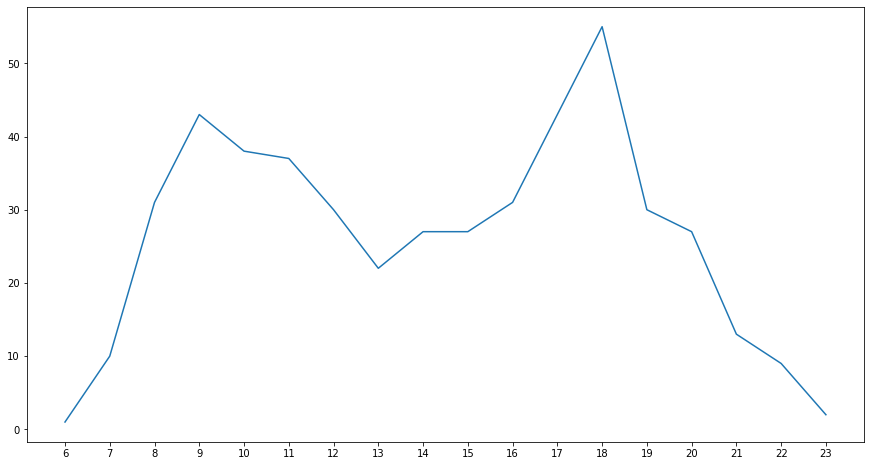

In [13]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [14]:
#整年貼文數量分佈
whole_year = lu[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,30
1,2019-02,25
2,2019-03,26
3,2019-04,20
4,2019-05,42
5,2019-06,40
6,2019-07,34
7,2019-08,33
8,2019-09,51
9,2019-10,62


In [15]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,12.000000
mean,39.666667
std,17.473790
min,20.000000
25%,29.000000
50%,33.500000
75%,44.250000
max,81.000000


In [16]:
results = lu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,27965206804191492,11191,0,0,0,0,0,322,448,428
2019-02,23304339003492912,14271,0,0,0,0,0,537,438,355
2019-03,24236512563632628,21936,0,0,0,0,0,1206,567,373
2019-04,18643471202794332,14598,0,0,0,0,0,628,377,293
2019-05,39151289525868096,29616,0,0,0,0,0,1760,875,650
2019-06,37286942405588656,33459,0,0,0,0,0,1122,834,593
2019-07,31693901044750356,29916,0,0,0,0,0,1154,860,519
2019-08,30761727484610640,72061,0,0,0,0,0,2929,1337,478
2019-09,47540851567125576,102168,0,0,0,0,0,4358,1863,689


In [17]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,27965206804191492,11191,0,0,0,0,0,322,448,428
1,2019-02,23304339003492912,14271,0,0,0,0,0,537,438,355
2,2019-03,24236512563632628,21936,0,0,0,0,0,1206,567,373
3,2019-04,18643471202794332,14598,0,0,0,0,0,628,377,293
4,2019-05,39151289525868096,29616,0,0,0,0,0,1760,875,650
5,2019-06,37286942405588656,33459,0,0,0,0,0,1122,834,593
6,2019-07,31693901044750356,29916,0,0,0,0,0,1154,860,519
7,2019-08,30761727484610640,72061,0,0,0,0,0,2929,1337,478
8,2019-09,47540851567125576,102168,0,0,0,0,0,4358,1863,689
9,2019-10,57794760728662496,149549,0,0,0,0,0,5400,2670,820


In [18]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
Name: newhead, dtype: object

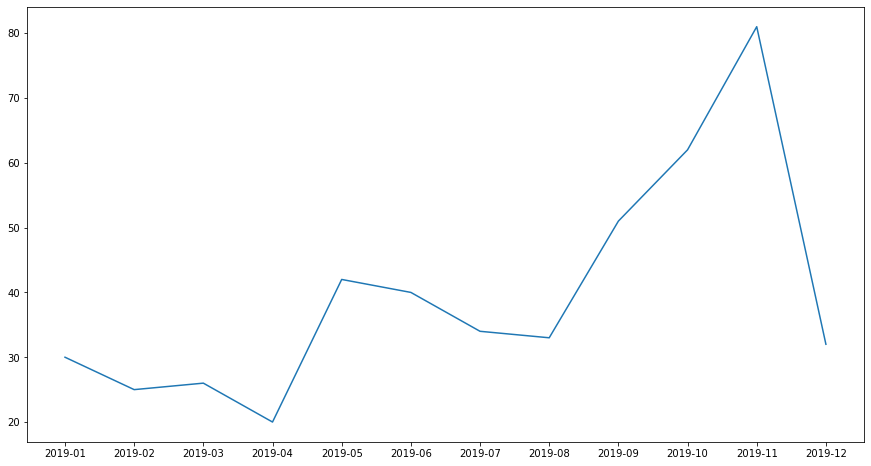

In [20]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [21]:
# 每個月的按讚、評論、分享總數 分佈
results = lu.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,27965206804191492,11191,0,0,0,0,0,322,448,428
1,2019-02,23304339003492912,14271,0,0,0,0,0,537,438,355
2,2019-03,24236512563632628,21936,0,0,0,0,0,1206,567,373
3,2019-04,18643471202794332,14598,0,0,0,0,0,628,377,293
4,2019-05,39151289525868096,29616,0,0,0,0,0,1760,875,650
5,2019-06,37286942405588656,33459,0,0,0,0,0,1122,834,593
6,2019-07,31693901044750356,29916,0,0,0,0,0,1154,860,519
7,2019-08,30761727484610640,72061,0,0,0,0,0,2929,1337,478
8,2019-09,47540851567125576,102168,0,0,0,0,0,4358,1863,689
9,2019-10,57794760728662496,149549,0,0,0,0,0,5400,2670,820


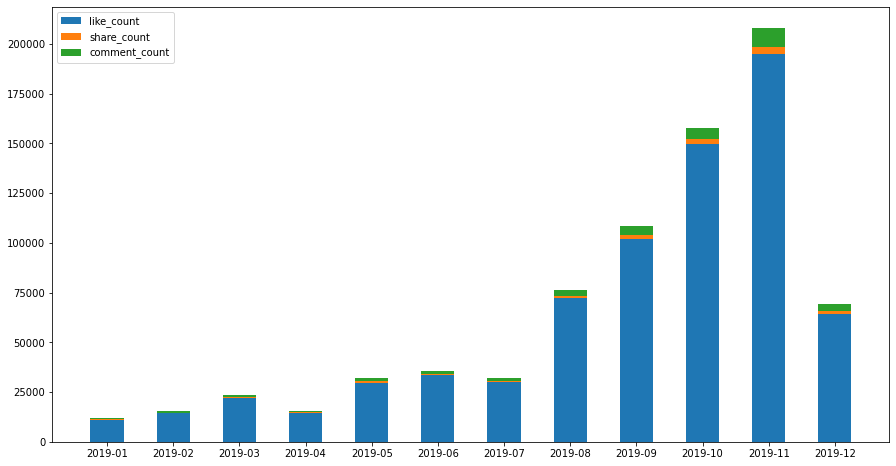

In [22]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [29]:
#找出按讚數量的統計值
lu['like_count'].describe()

count      476.000000
mean      1549.943277
std       1868.935683
min        121.000000
25%        497.750000
50%       1010.500000
75%       1705.250000
max      15682.000000
Name: like_count, dtype: float64

In [30]:
#找出評論數量的統計值
lu['comment_count'].describe()

count    476.000000
mean      67.918067
std       82.859244
min        1.000000
25%       24.000000
50%       42.000000
75%       78.000000
max      874.000000
Name: comment_count, dtype: float64

In [23]:
#8、9、10、11月按讚、分享、評論數特別高，因此找出該月份的資料
high = lu[lu.month_year == "2019-08"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-08-01,1864347120279434,7546,0,0,0,0,0,257,93,24
1,2019-08-02,932173560139717,824,0,0,0,0,0,40,21,13
2,2019-08-03,932173560139717,7933,0,0,0,0,0,217,77,11
3,2019-08-05,932173560139717,1393,0,0,0,0,0,50,30,14
4,2019-08-06,932173560139717,978,0,0,0,0,0,60,27,12
5,2019-08-07,932173560139717,3445,0,0,0,0,0,93,43,10
6,2019-08-08,1864347120279434,1887,0,0,0,0,0,77,39,26
7,2019-08-11,1864347120279434,3849,0,0,0,0,0,176,62,42
8,2019-08-12,932173560139717,4103,0,0,0,0,0,81,97,12
9,2019-08-13,932173560139717,1462,0,0,0,0,0,77,26,15


No handles with labels found to put in legend.


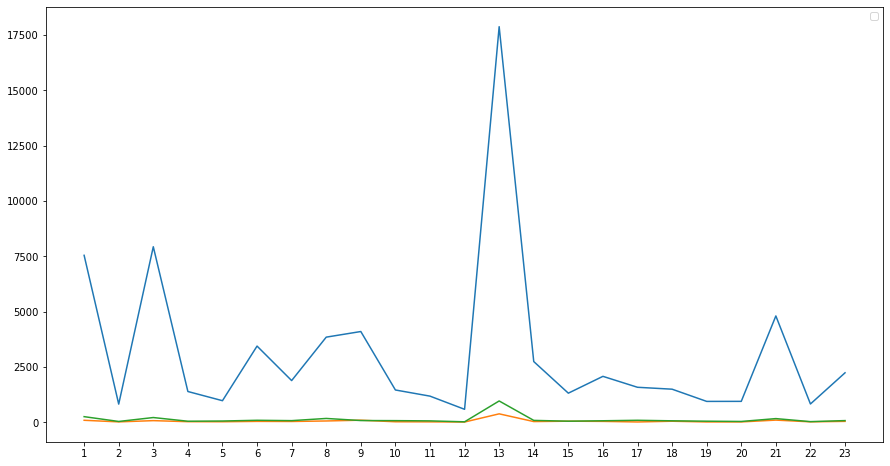

In [24]:
#畫圖 看整個八月按讚、分享、評論的流量
labels = [str(i) for i in range(1,24)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [25]:
# 8/20 號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Aug_20 = lu[lu['new_date'] == "2019-08-20"]
Aug_20[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-25-a7ebbdc94b69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
6988,【我是北海岸的女兒，我為我的家鄉努力不畏戰！】 首先，謝謝黃委員對我的指教和批評，我想每位...,772,12715
6989,今天為了提升長者們的道路交通安全意識，我特別邀請交通部公路總局、台北區監理所在泰山舉辦「#高...,31,819
6990,給我們一直在成長、進步的美麗家鄉一個熱烈的掌聲👏🏻👏🏻 不知道各位在經過林口文化北路時，有...,163,4341


回應黃國昌靠爸說

In [26]:
#8、9、10、11月按讚、分享、評論數特別高，因此找出該月份的資料
highh = lu[lu.month_year == "2019-09"]
results_highh = highh.groupby('new_date').sum()
results_highh.index.name = 'newhead' #更改欄位名稱
results_highh.reset_index(inplace=True)
results_highh

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-09-01,1864347120279434,1658,0,0,0,0,0,64,33,29
1,2019-09-02,1864347120279434,1850,0,0,0,0,0,96,37,23
2,2019-09-03,1864347120279434,1971,0,0,0,0,0,79,45,27
3,2019-09-04,932173560139717,803,0,0,0,0,0,42,17,9
4,2019-09-05,932173560139717,4705,0,0,0,0,0,148,42,18
5,2019-09-06,1864347120279434,1505,0,0,0,0,0,68,38,27
6,2019-09-07,1864347120279434,1162,0,0,0,0,0,72,32,29
7,2019-09-08,1864347120279434,1622,0,0,0,0,0,69,36,30
8,2019-09-09,932173560139717,3734,0,0,0,0,0,145,95,11
9,2019-09-10,1864347120279434,2412,0,0,0,0,0,117,62,22


No handles with labels found to put in legend.


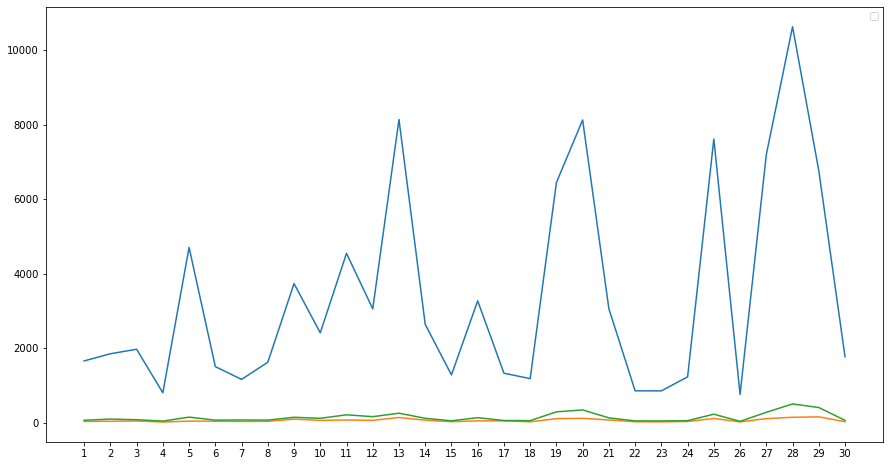

In [27]:
#畫圖 看整個九月按讚、分享、評論的流量
labels = [str(i) for i in range(1,31)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highh['like_count'])
ax.plot(labels, results_highh['share_count'])
ax.plot(labels, results_highh['comment_count'])

ax.legend()

plt.show()

In [28]:
# 9/28 號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Sep_28 = lu[lu['new_date'] == "2019-09-28"]
Sep_28[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-28-b2fa496d5170>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7068,大家晚安！ 明天我們 #撐港護台大遊行 見喔！ #奮力拚戰呂孫綾 #不分大小事認真做好每件事,156,4310
7069,今天，我們在 #33年前創黨的圓山飯店，舉辦民進黨的黨慶與全代會，我們台灣從威權時代、一路走...,80,1772
7070,✨2020總統立委一起贏✨ 早安您好！ 孫綾邀請您一起加入台灣隊，製作出我們的專屬合照📷 ...,106,1806
7071,早安，週六早上我在淡水向鄉親好朋友問候請安喔！ #風雨生信心呂孫綾 #不分大小事認真做好每...,161,2743


數篇，但都在前25%

In [31]:
#8、9、10、11月按讚、分享、評論數特別高，因此找出該月份的資料
higher = lin[lin.month_year == "2019-10"]
results_higher = higher.groupby('new_date').sum()
results_higher.index.name = 'newhead' #更改欄位名稱
results_higher.reset_index(inplace=True)
results_higher

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-10-01,1864347120279434,5527,0,0,0,0,0,186,88,26
1,2019-10-02,932173560139717,925,0,0,0,0,0,62,25,17
2,2019-10-03,932173560139717,1474,0,0,0,0,0,86,36,11
3,2019-10-04,1864347120279434,3473,0,0,0,0,0,148,85,22
4,2019-10-05,1864347120279434,8327,0,0,0,0,0,312,129,25
5,2019-10-06,932173560139717,3119,0,0,0,0,0,134,50,7
6,2019-10-07,2796520680419151,8039,0,0,0,0,0,248,98,43
7,2019-10-08,932173560139717,10236,0,0,0,0,0,333,173,12
8,2019-10-09,1864347120279434,12483,0,0,0,0,0,420,217,18
9,2019-10-10,2796520680419151,3578,0,0,0,0,0,242,70,40


No handles with labels found to put in legend.


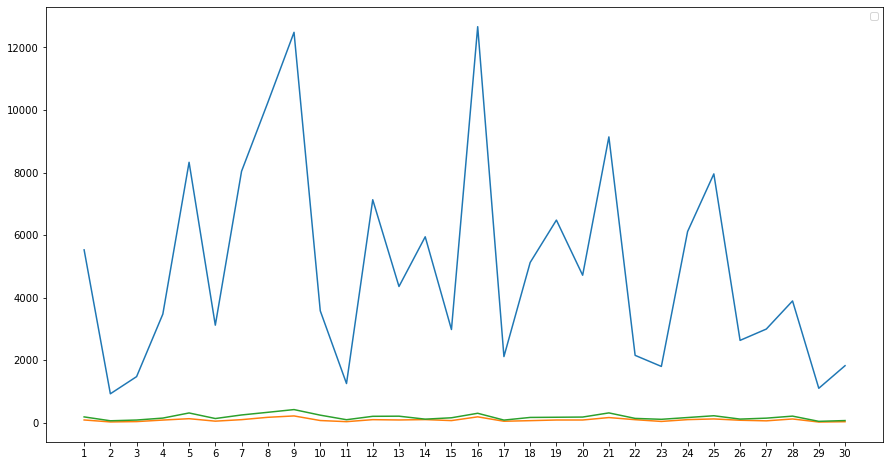

In [33]:
#畫圖 看整個十月按讚、分享、評論的流量
labels = [str(i) for i in range(1,31)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_higher['like_count'])
ax.plot(labels, results_higher['share_count'])
ax.plot(labels, results_higher['comment_count'])

ax.legend()

plt.show()

In [34]:
# 10/9 號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Oct_09 = lu[lu['new_date'] == "2019-10-09"]
Oct_09[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-34-324f50b036dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7048,【守民主 護台灣 — 10 10 台灣蔡與綾 特別企劃】 2020台灣大選，是台灣未來民主...,327,11186
7049,大家早安！ 昨天我質詢 蘇貞昌 院長有關中國遊客來台，撕毀我們連儂牆的看法。 我與蘇院長的...,93,1297


In [35]:
# 10/16 號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Oct_16 = lu[lu['new_date'] == "2019-10-16"]
Oct_16[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-35-6341258cf33d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7094,我們泰山區一年一度重大盛事「顯應祖師聖誕大繞境」，今天隆重舉行！ #顯應祖師保佑 #遶境平...,33,1023
7095,【台灣蔡與綾】 🙋‍♀️呂孫綾政治獻金小額捐款 募款小物活動全面懇託！ - 2020的台...,269,11640


總統帶小雞（9、16）、訴諸於中國（9）

In [36]:
#8、9、10、11月按讚、分享、評論數特別高，因此找出該月份的資料
highest = lu[lu.month_year == "2019-11"]
results_highest = highest.groupby('new_date').sum()
results_highest.index.name = 'newhead' #更改欄位名稱
results_highest.reset_index(inplace=True)
results_highest

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-11-01,1864347120279434,6253,0,0,0,0,0,199,86,25
1,2019-11-02,1864347120279434,4214,0,0,0,0,0,170,36,23
2,2019-11-03,1864347120279434,3625,0,0,0,0,0,134,47,31
3,2019-11-04,932173560139717,1977,0,0,0,0,0,62,55,17
4,2019-11-05,932173560139717,6229,0,0,0,0,0,164,99,9
5,2019-11-06,932173560139717,1549,0,0,0,0,0,90,35,8
6,2019-11-07,1864347120279434,4352,0,0,0,0,0,170,81,29
7,2019-11-08,2796520680419151,13326,0,0,0,0,0,438,287,39
8,2019-11-09,2796520680419151,6275,0,0,0,0,0,187,89,47
9,2019-11-10,1864347120279434,3357,0,0,0,0,0,180,73,27


No handles with labels found to put in legend.


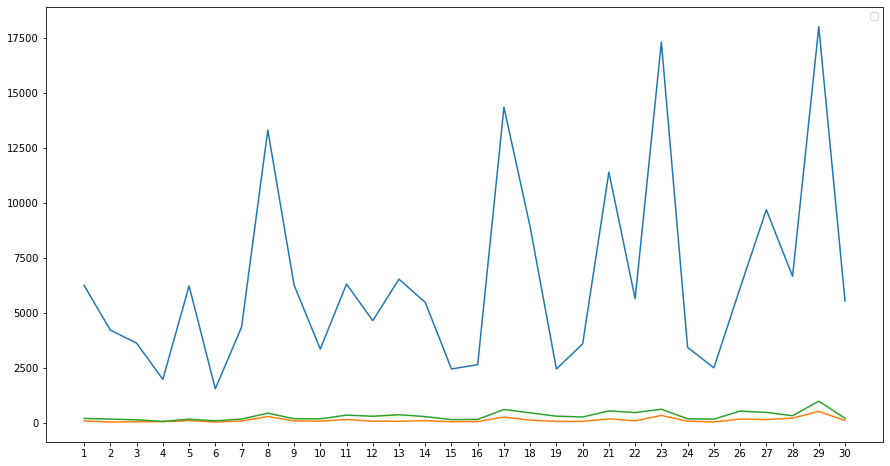

In [37]:
#畫圖 看整個11月按讚、分享、評論的流量
labels = [str(i) for i in range(1,31)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highest['like_count'])
ax.plot(labels, results_highest['share_count'])
ax.plot(labels, results_highest['comment_count'])

ax.legend()

plt.show()

In [42]:
# 11/8、17、23、29號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Nov_08 = lu[lu['new_date'] == "2019-11-08"]
Nov_08[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-42-30d7e807dc23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7113,原來，呂孫綾吃了酸梅也會那麼酸！,176,2356
7114,家有3歲以下幼兒的好朋友，呂孫綾報乎您知！ 👨‍👩‍👧👪 今年8月準公共化幼兒園政策正...,185,8406
7115,大家早安！😘😘😘 今天立冬，明天又是星期六，準備買菜了嗎？🥬🌽🍅🥦🍆🥕 阿北已經90歲了，...,77,2564


政績宣導

In [40]:
# 11/8、17、23、29號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Nov_17 = lu[lu['new_date'] == "2019-11-17"]
Nov_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-40-144cce9d9510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7159,蔡英文呂孫綾深深一鞠躬 感謝各位林口的鄉親好朋友們，今晚晚會成功的完美落幕，現場也湧進超過...,192,6869
7160,【現場直播中】 總統蔡英文x桃園市長鄭文燦x立委呂孫綾林口新北群英音樂晚會 #新北第一呂...,243,3000
7161,【現場直播中】 總統蔡英文x桃園市長鄭文燦x立委呂孫綾林口新北群英音樂晚會 #新北第一呂...,92,2433
7162,【就是今天！小英總統在林口新北群英會🎼】 今天除了賴清德院長擔任副總統候選人，要和蔡英文 ...,61,1427
7163,大家早安！ 今天一早就聽到最令人振奮的消息，就是 蔡英文 Tsai Ing-wen 總統，邀...,19,632


數篇、總統帶小雞

In [43]:
# 11/8、17、23、29號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Nov_23 = lu[lu['new_date'] == "2019-11-23"]
Nov_23[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-43-b81d0102a401>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7142,呂孫綾始終相信 #一票一腳印，只有實在、誠懇地跟鄉親好朋友堅定站在一起，為我的家鄉認真努力打...,168,3395
7143,【11/30(六)海波兒童劇團在泰山】 #活動完全免費無需報名歡迎直接入場🎉 呂孫綾姐姐的...,153,5254
7144,「抗中護台」是我們一致的目標，也是台灣人民的普世價值，在這條路上我們每位都是 #台灣隊 的一...,298,8673


中國牌

In [44]:
# 11/8、17、23、29號很明顯按讚衝高  因此找出這天的文章
lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str
Nov_29 = lu[lu['new_date'] == "2019-11-29"]
Nov_29[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-44-99f580b692e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu['new_date']=lu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
7215,呂孫綾主張： 全民下架 吳斯懷。,874,15682
7216,就在明天！海波兒童劇團在泰山！！ #活動完全免費無需報名歡迎直接入場🎉 呂孫綾姐姐將會化身...,33,1159
7217,早安！ 天氣越來越冷，寒流一波一波接力報到，呂孫綾提醒大家，一定要隨時注意保暖、多喝溫開水...,77,1183


KMT牌

In [45]:
#按讚次數最多的貼文 
mostlike_10 = lu.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
7215,呂孫綾主張： 全民下架 吳斯懷。,15682,2019-11
6988,【我是北海岸的女兒，我為我的家鄉努力不畏戰！】 首先，謝謝黃委員對我的指教和批評，我想每位...,12715,2019-08
7095,【台灣蔡與綾】 🙋‍♀️呂孫綾政治獻金小額捐款 募款小物活動全面懇託！ - 2020的台...,11640,2019-10
7048,【守民主 護台灣 — 10 10 台灣蔡與綾 特別企劃】 2020台灣大選，是台灣未來民主...,11186,2019-10
7050,【呂孫綾爭取淡水北海岸設置大型醫院 蘇貞昌院長：全力支持】 淡海新市鎮從開發到現在已經將...,10236,2019-10
7144,「抗中護台」是我們一致的目標，也是台灣人民的普世價值，在這條路上我們每位都是 #台灣隊 的一...,8673,2019-11
7114,家有3歲以下幼兒的好朋友，呂孫綾報乎您知！ 👨‍👩‍👧👪 今年8月準公共化幼兒園政策正...,8406,2019-11
7207,今天新北市競選總部成立，現場風和日麗、人山人海，非常熱鬧！ 感謝各位鄉親好朋友來幫我加油打氣...,8276,2019-12
7031,【呂孫綾X賴品妤 服務北海岸大連線】 大家對 賴品妤的第一印象，是不是在記者會上，頭插入麥...,8126,2019-09
6974,2016年2月剛就任立委，我和 林昶佐 Freddy Lim、陳亭妃 、蔡適應 、 羅致政粉...,7933,2019-08


In [46]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = lu.sort_values(by = ['like_count'],ascending= False ).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,10,10,10,10,10,0,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [47]:
# 比較、查看他政見
promise = politics[politics.姓名 == "呂 孫 綾"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['9    本選區位於新北市外圈廊帶，有文化古鎮、自然景緻，也有多個新市鎮與現代 開發計畫，要有新思維與...']

曝光度高前10 >>> 政績宣導（學齡前兒童、地方建設）、中國因素、總統帶小雞